<a href="https://colab.research.google.com/github/mutasimm/INMAS/blob/main/project_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # This evaluate the performance of K-Means clustering
from sklearn.preprocessing import StandardScaler  # This normalize the predictors
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import tensorflow as tf
import xgboost

In [ ]:
# Importing the table and data cleaning
table = pd.read_excel("Appendix_2_Data_for_Figure_2.1.xls")
table = table.drop(axis=1, columns=["RANK", "Whisker-high", "Whisker-low"]).dropna()
# Renaming the columns
table.columns = ["country", "happiness_score", "dystopia", "gdp", "support", "life_expectancy", "freedom", "generosity", "corruption"]


# Dropping "country", "happiness score" and "dystopia" and storing six factors
data = table.drop(axis=1, columns=["country", "happiness_score", "dystopia"])


# Getting the normalized z-scores of the data, stored as data_matrix
scaler = StandardScaler()
scaler.fit(data)
data_matrix = scaler.transform(data)


# Principal component analysis of the data_matrix
pca_components = 6
pca = PCA(n_components=pca_components)
pca.fit(data_matrix)
print("The explained variance ratios are:", pca.explained_variance_ratio_)
print("The singular values are:", pca.singular_values_)
print("The components are:", pca.components_)
# From the result, we may conclude that the The first three component accounts for most of the variance of the data


# Run through different number of components(1-6) and clusters(2-9, We use K-Means clustering method)
# then use silhouette scores to evaluate different scenarios and choose the best one
Scores = np.full((6, 8), 0.0)
for comp in range(1,7):
    pca = PCA(n_components = comp)
    pca.fit(data_matrix)
    pca_samples = pd.DataFrame(pca.transform(data_matrix))
    for clus in range(2,10):
        kmeans = KMeans(n_clusters=clus, random_state=0).fit(pca_samples.values)
        df = data.copy()
        df["clustering"] = kmeans.labels_
        score = silhouette_score(data_matrix, kmeans.labels_, metric='euclidean')
        Scores[comp-1,clus-2] = score
Scores = pd.DataFrame(Scores).set_index([pd.Index(["1 component", "2 components", "3 components", "4 components", "5 components", "6 components"])])
Scores.columns = ["2 clusters", "3 clusters", "4 clusters", "5 clusters", "6 clusters", "7 clusters", "8 clusters", "9 clusters"]
display(Scores)
# We found out that the K-Means clustering works the best when we have 3 components and 2 clusters


FileNotFoundError: ignored

In [ ]:
# clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
# This realizes Hierarchical clustering, which searchs the optimal number of clusters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/Users/kingofwh/Downloads/2022data.csv") # need to be changed
# Columns names are "Country", "Happiness score", "Dystopia plus residual", "GDP per capita", "Social support", "HLE",
# "Freedom", "Generosity", "corruption"

df1 = pd.DataFrame(data, columns = ['GDP per capita', 'Social support', 'HLE', 'Freedom to make life choices', 'Generosity', 'corruption'])
# this data frame contains all six variables
kmeans = KMeans(n_clusters = 3).fit(df1)
# fit the KMeans-clustering with number of clusters = 3, using all six variables
sns.scatterplot(data = df1, x = 'GDP per capita', y = 'HLE', c = kmeans.labels_.astype(float), s=50, alpha=0.5);
# plot the GDP per capita and HLE, according to the clustering. The results should be below.
# the three groups, can be classified as developed, developing and poor countries.

clustering = AgglomerativeClustering().fit(df1)
# Hierarchical clustering
sns.scatterplot(data = df1, x = 'GDP per capita', y = 'HLE', c = clustering.labels_.astype(float), s=50, alpha=0.5);
# should be as below.






3 clusters, k-means
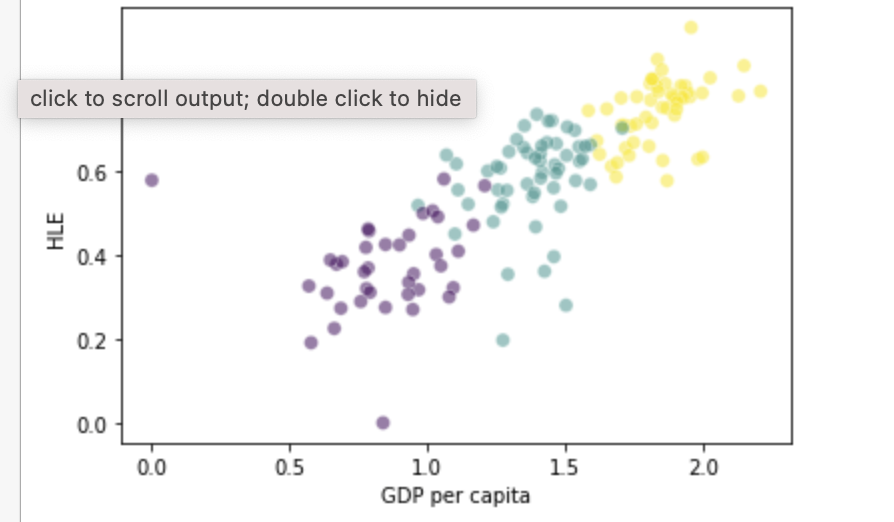

2-clusters, Hierarchical clustering
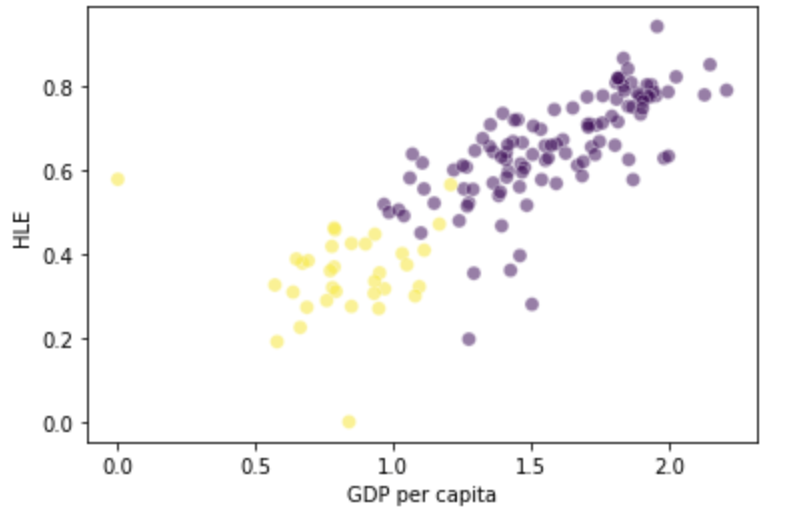

In [ ]:
### Mutasim Mim
### Below are mostly regression stuff
### The 'data' file is the result of removing 19 contries with more than 5 entries missing in at least one column and imputing the remaining missing
### data by country-wise mean

### You will need to upload the data_.csv file to run the following code blocks

Scatter plots of the ladder varibles suggest strong correlation with 

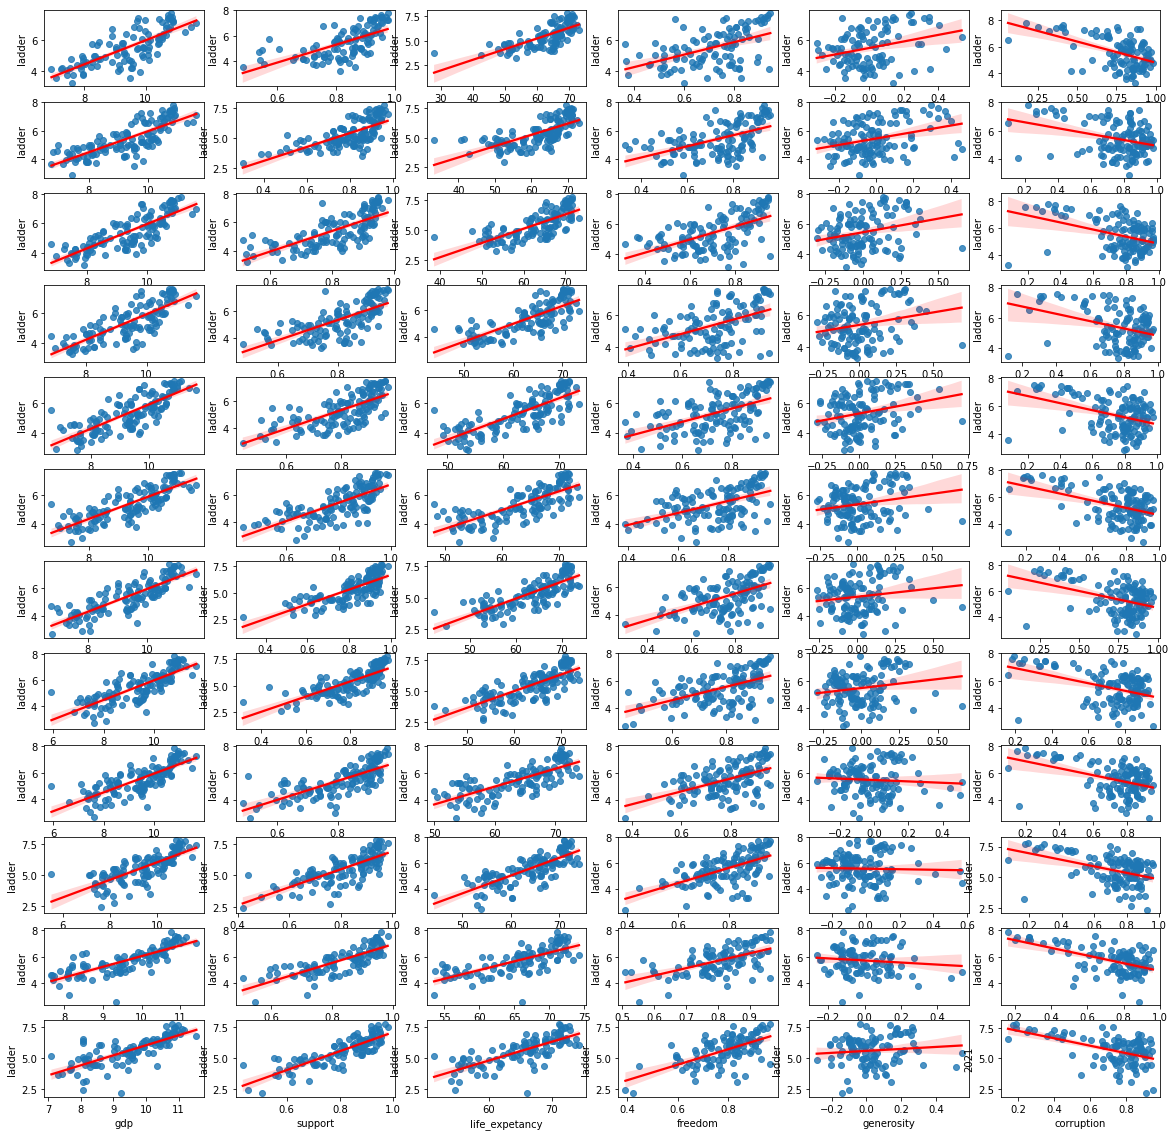

In [ ]:
data = pd.read_csv('/content/data_.csv')

# Visualizing how ladder depends (or not) on other predictors for years 2010 through 2022
fig, ax = plt.subplots(12,6, figsize=(20,20))
ax_ = ax.ravel()

counter = 0
for year in range(2010,2022):
    y_data = data[data['year']==year]
    for column in ['gdp', 'support', 'life_expetancy', 'freedom', 'generosity', 'corruption']:
        sns.regplot(data=y_data,x=column,y='ladder', ax=ax_[counter], line_kws={'color':'red'})
        plt.ylabel(year)
        counter += 1


In [ ]:
# While we see a year-to-year similar trend, it appears that gdp, support, life_expectancy, and freedom
# are primary indicators of happiness

In [ ]:
# We will fit a full linear regression model, and one with only the four varibles mentioned above

In [ ]:
y = data['ladder']
X = data.drop(['ladder','country','year', 'Unnamed: 0', 'positive', 'negative'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=2, train_size=0.8)

In [ ]:
# OLS with all variables
reg = LinearRegression()
reg.fit(x_train, y_train)
print('OLS Score: {}'.format(reg.score(x_test, y_test)))

# OLS with the four variables
reg1 = LinearRegression()
reg1.fit(x_train[['gdp', 'support', 'life_expetancy', 'freedom']], y_train)
print('OLS with selected variables score: {}'.format(reg1.score(x_test[['gdp', 'support', 'life_expetancy', 'freedom']], y_test)))

OLS Score: 0.7686039845665705
OLS with selected variables score: 0.73740357733315


errors at least alpha:  alpga = 0.0 , percentage = 47.83783783783784
errors at least alpha:  alpga = 0.05263157894736842 , percentage = 43.78378378378378
errors at least alpha:  alpga = 0.10526315789473684 , percentage = 40.0
errors at least alpha:  alpga = 0.15789473684210525 , percentage = 37.027027027027025
errors at least alpha:  alpga = 0.21052631578947367 , percentage = 34.32432432432432
errors at least alpha:  alpga = 0.2631578947368421 , percentage = 32.432432432432435
errors at least alpha:  alpga = 0.3157894736842105 , percentage = 29.18918918918919
errors at least alpha:  alpga = 0.3684210526315789 , percentage = 26.486486486486488
errors at least alpha:  alpga = 0.42105263157894735 , percentage = 23.513513513513512
errors at least alpha:  alpga = 0.47368421052631576 , percentage = 21.62162162162162
errors at least alpha:  alpga = 0.5263157894736842 , percentage = 19.45945945945946
errors at least alpha:  alpga = 0.5789473684210527 , percentage = 15.945945945945946
errors at

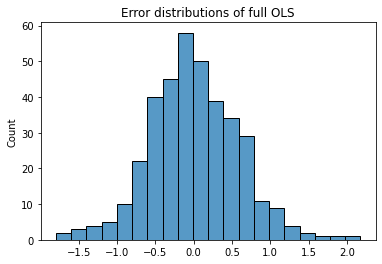

In [ ]:
# Error plot for full OLS
predictions = reg.predict(x_test)
errors = np.array(predictions)-np.array(y_test)

sns.histplot(errors)
plt.title('Error distributions of full OLS')

for alpha in np.linspace(0.0,1.0,20):
  print('errors at least alpha:  alpga = {} , percentage = {}'.format(alpha, 100 * np.sum(errors >= alpha) / len(errors)))

In [ ]:
'''
Conclusion: we see that the predictors are able to (somewhat well) predict the happiness score. Removing the corruption and cofidence in government variables cause loss of little acuracy
'''

'\nConclusion: we see that the predictors are able to (somewhat well) predict the happiness score. Removing the corruption and cofidence in government variables cause loss of little acuracy\n'

In [ ]:
'''
Next we fit a simple neural net with 3 neurons in one hidden layer. Considering the small size of the dataset, we kept the structure of the neural network simple. Additionally,
we have trained the network over 200 epochs, again, considering the small size of the dataset.
'''

'\nNext we fit a simple neural net with 3 neurons in one hidden layer. Considering the small size of the dataset, we kept the structure of the neural network simple. Additionally,\nwe have trained the network over 200 epochs, again, considering the small size of the dataset.\n'

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

# Note that due to the extremely simple structure of the network, we have not used an dropout of pulling layer
model.compile(optimizer='adam',metrics=['mean_squared_error'],
              loss=tf.keras.losses.mean_squared_error)
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
47/47 [==============================] - 1s 987us/step - loss: 24.2627 - mean_squared_error: 24.2627
Epoch 2/200
47/47 [==============================] - 0s 971us/step - loss: 22.0970 - mean_squared_error: 22.0970
Epoch 3/200
47/47 [==============================] - 0s 890us/step - loss: 20.2365 - mean_squared_error: 20.2365
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 18.4406 - mean_squared_error: 18.4406
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 16.7239 - mean_squared_error: 16.7239
Epoch 6/200
47/47 [==============================] - 0s 883us/step - loss: 15.0878 - mean_squared_error: 15.0878
Epoch 7/200
47/47 [==============================] - 0s 935us/step - loss: 13.4641 - mean_squared_error: 13.4641
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 11.7737 - mean_squared_error: 11.7737
Epoch 9/200
47/47 [==============================] - 0s 987us/step - loss: 10.1121 - mean_squared_erro

12/12 [==============================] - 0s 1ms/step - loss: 0.3764 - mean_squared_error: 0.3764
MSS: [0.3763825595378876, 0.3763825595378876]


Text(0.5, 1.0, 'Error distribution for Neural Net model')

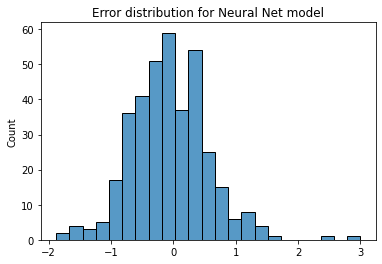

In [ ]:
# Once trained, we evaluate the mean-squared-error of the model
predictions = model.predict(x_test)
predictions = [pred[0] for pred in predictions]

print('MSS: {}'.format(model.evaluate(x_test, y_test)))

# We also plot the errors in a histogram
sns.histplot(np.array(predictions)-np.array(y_test))
plt.title('Error distribution for Neural Net model')

In [ ]:
'''
As we can see, most of the results are withing \pm 1 of the actual output, which suggests that our model is at least somewhat appropriate, and the predictors have significant predicting capabilities.

'''

'\nAs we can see, most of the results are withing \\pm 1 of the actual output, which suggests that our model is at least somewhat appropriate, and the predictors have significant predicting capabilities.\n\n'

In [ ]:
# Some basic statistics
errors = np.array(predictions)-np.array(y_test)

for alpha in np.linspace(0.0,1.0,20):
  print('errors at least alpha:  alpga = {} , percentage = {}'.format(alpha, 100 * np.sum(errors >= alpha) / len(errors)))

errors at least alpha:  alpga = 0.0 , percentage = 42.7027027027027
errors at least alpha:  alpga = 0.05263157894736842 , percentage = 38.37837837837838
errors at least alpha:  alpga = 0.10526315789473684 , percentage = 36.75675675675676
errors at least alpha:  alpga = 0.15789473684210525 , percentage = 33.78378378378378
errors at least alpha:  alpga = 0.21052631578947367 , percentage = 31.62162162162162
errors at least alpha:  alpga = 0.2631578947368421 , percentage = 29.72972972972973
errors at least alpha:  alpga = 0.3157894736842105 , percentage = 25.945945945945947
errors at least alpha:  alpga = 0.3684210526315789 , percentage = 20.54054054054054
errors at least alpha:  alpga = 0.42105263157894735 , percentage = 17.83783783783784
errors at least alpha:  alpga = 0.47368421052631576 , percentage = 15.675675675675675
errors at least alpha:  alpga = 0.5263157894736842 , percentage = 14.054054054054054
errors at least alpha:  alpga = 0.5789473684210527 , percentage = 12.43243243243243

In [ ]:
''''
That is, about the model predicts about within 0.42 of the actual happiness score reported by the participants for 80% of the
samples in the test set. 90% samples are within 0.65 of the actual response. 95% or responses are within 1 of the actual response.
'''

"'\nThat is, about the model predicts about within 0.42 of the actual happiness score reported by the participants for 80% of the\nsamples in the test set. 90% samples are within 0.65 of the actual response. 95% or responses are within 1 of the actual response.\n"

Epoch 1/200
47/47 [==============================] - 1s 3ms/step - loss: 27.2455 - mean_squared_error: 27.2455
Epoch 2/200
47/47 [==============================] - 0s 3ms/step - loss: 25.4635 - mean_squared_error: 25.4635
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 23.3300 - mean_squared_error: 23.3300
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 21.8616 - mean_squared_error: 21.8616
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 20.5055 - mean_squared_error: 20.5055
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 19.1836 - mean_squared_error: 19.1836
Epoch 7/200
47/47 [==============================] - 0s 3ms/step - loss: 17.8915 - mean_squared_error: 17.8915
Epoch 8/200
47/47 [==============================] - 0s 3ms/step - loss: 16.6272 - mean_squared_error: 16.6272
Epoch 9/200
47/47 [==============================] - 0s 3ms/step - loss: 15.3926 - mean_squared_error: 15.3926
E

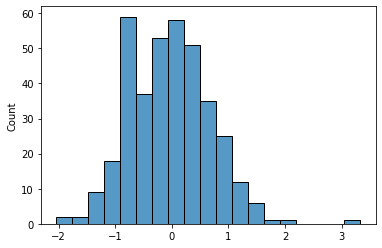

In [ ]:
# What if we restriced ourselves to only the predictors gdp and life_expectancy?

model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

# Note that due to the extremely simple structure of the network, we have not used an dropout of pulling layer
model.compile(optimizer='adam',metrics=['mean_squared_error'],
              loss=tf.keras.losses.mean_squared_error)
model.fit(x_train[['gdp','life_expetancy']], y_train, epochs=200)

# Once trained, we evaluate the mean-squared-error of the model
predictions = model.predict(x_test[['gdp','life_expetancy']])
predictions = [pred[0] for pred in predictions]

print('MSS: {}'.format(model.evaluate(x_test[['gdp','life_expetancy']], y_test)))

# We also plot the errors in a histogram
sns.histplot(np.array(predictions)-np.array(y_test))


# Some basic statistics
errors = np.array(predictions)-np.array(y_test)

for alpha in np.linspace(0.0,1.0,20):
  print('errors at least alpha:  alpga = {} , percentage = {}'.format(alpha, 100 * np.sum(errors >= alpha) / len(errors)))